#Homework 1: kNN (20pt)
In this HW, you will write the $k$ Nearest Neighbors algorithm and run it on the synthetical data. Then, you will use the built-in function from *sklearn* library.

#Part I. Vanilla $k$NN (17.5pt)

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#import other modules here

In [3]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

1. (0.5pt) Check the shapes of $X$ and $y$

In [4]:
#your code here
print(X.shape)
print(y.shape)

(300, 2)
(300,)


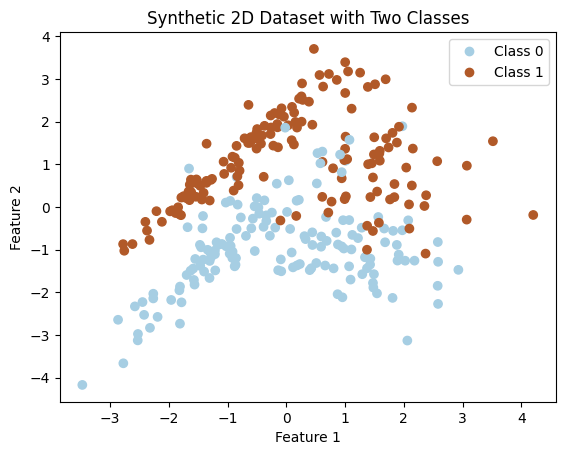

In [5]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

2. (1pt) Split the data into train and test sets. You can use a built-in [function train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn. (To get the same result as in the lecture slides, use the parameters from the example in the description of the function.)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

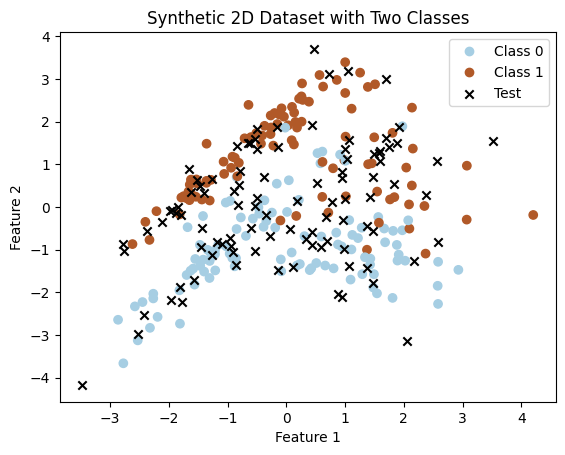

In [12]:
# Plot the synthetic dataset again
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0]+[scatter_test], labels=['Class 0', 'Class 1', 'Test'])

3. (9pt) Fill-in the functions *compute_distances_two_loops*, *compute_distances_one_loop*, and *predict_labels* of the followng class. Use $L_1$ (Manhattan) distance:
$$
d(x,\ x^{(i)}) =\sum_{j=1}^{d} |x_j-x^{(i)}_j|.
$$

In [13]:
class kNNClassifier:
  def __init__(self, k=1, n_loops=2):
     self.k = k
     self.n_loops = n_loops

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    if self.n_loops == 2:
      distances = self.compute_distances_two_loops(X)
    elif self.n_loops == 1:
      distances = self.compute_distances_one_loop(X)
    return self.predict_labels(distances)

  def compute_distances_two_loops(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #your code here
    num_test = X.shape[0]
    num_train = self.train_X.shape[0]
    distances = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
            # Compute L1 (Manhattan) distance
            distances[i, j] = np.sum(np.abs(X[i] - self.train_X[j]))
    return distances

  def compute_distances_one_loop(self, X): #or without for loops at all (see ML2 problems)
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #your code here
    num_test = X.shape[0]
    num_train = self.train_X.shape[0]
    distances = np.zeros((num_test, num_train))
    for i in range(num_test):
        # Use broadcasting for L1 distance calculation
        distances[i, :] = np.sum(np.abs(X[i] - self.train_X), axis=1)
    return distances

  def predict_labels(self, distances):
    """
    distances: np array (n_test_samples, n_train_samples)
    output: np array (n_test_samples,)
    """
    #your code here
    num_test = distances.shape[0]
    y_pred = np.zeros(num_test, dtype=int)
    for i in range(num_test):
        # Find the k nearest neighbors
        nearest_neighbors = np.argsort(distances[i])[:self.k]
        # Get the most common class label
        closest_y = self.train_y[nearest_neighbors]
        y_pred[i] = np.bincount(closest_y).argmax()
    return y_pred

4. Fit the model with 2 for loops (one neighbor)

In [14]:
# create an object of the class above
clf_2 = kNNClassifier()

In [15]:
# fit the model on the training data
clf_2.fit(X_train,y_train)

5. Fit the model with 1 for loop

In [16]:
# create an object of the class above
clf_1 = kNNClassifier(n_loops=1)

In [17]:
# fit the model on the training data
clf_1.fit(X_train,y_train)

6a). (0.5pt) Make a prediction on the points with coordinates $(0, -2)$

In [33]:
point_1 = np.array([[0, -2]])
prediction_1 = clf_1.predict(point_1)
print(prediction_1)

[0]


6b). (0.5pt) Make a prediction on the points with coordinates $(0, 2)$

In [34]:
point_2 = np.array([[0, 2]])
prediction_2 = clf_1.predict(point_2)
print(prediction_2)

[1]


7. Plot the decision boundary. You can use function [plot_decision_regions](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions)

8.811228275299072

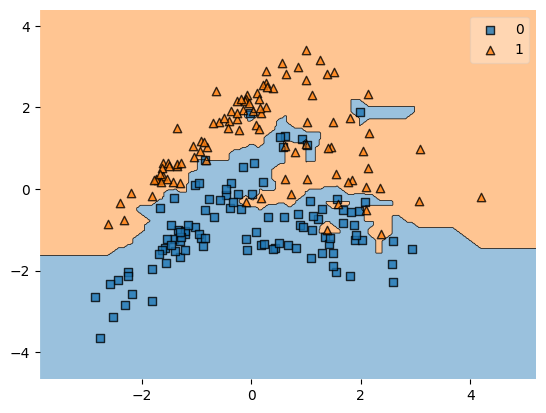

In [35]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_1)
end_time = time.time()
end_time - start_time

387.89355063438416

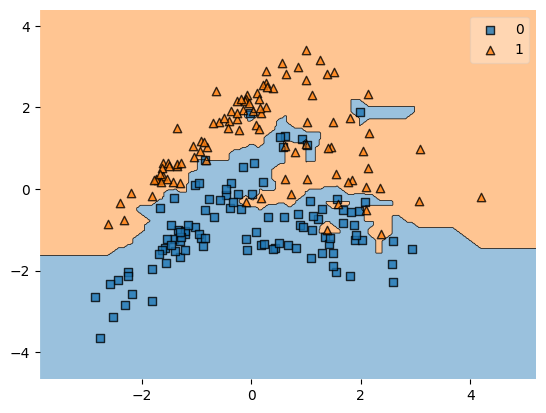

In [37]:
#You may whant to compare the performance with loops
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_2)
end_time = time.time()
end_time - start_time

8. (2.5pt) Now, use the built-in class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Think about what parameter to use in order to get the same plot as above.

In [46]:
clf_3 = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

In [47]:
# fit the model on the training data
clf_3.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

14.562785387039185

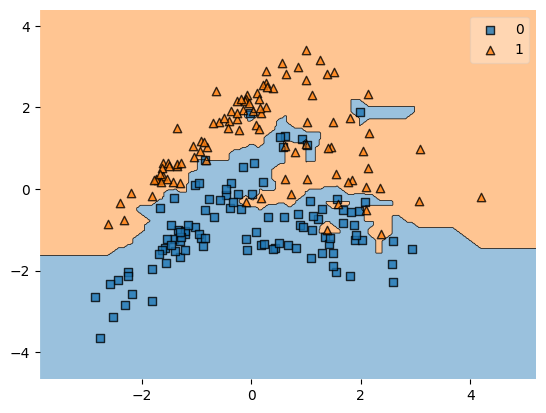

In [48]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_3)
end_time = time.time()
end_time - start_time

9. (3pt) Choose $k.$  Write a for loop over 40 values of $k,$ for every $k$ train the fastest model on the train data and make prediction on the train and on the test data and store the accuracy on both sets. Plot the curves similar to ones in Lecture 2. To calculate accuracy you can use function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).  

In [51]:
train_accuracies = []
test_accuracies = []
k_values = range(1, 41)

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

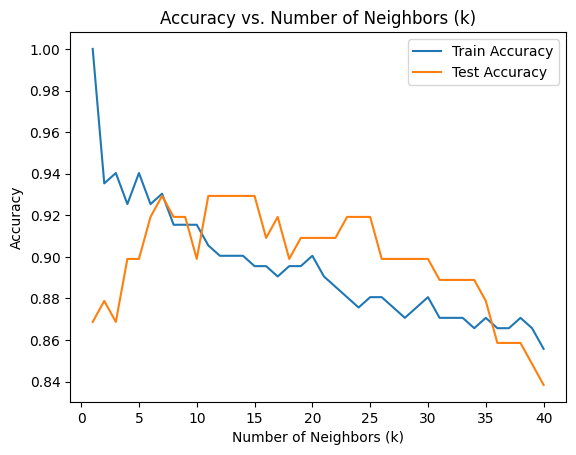

In [57]:
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(False)
plt.show()

10. For the 'best' $k$ plot the desicion boundary.

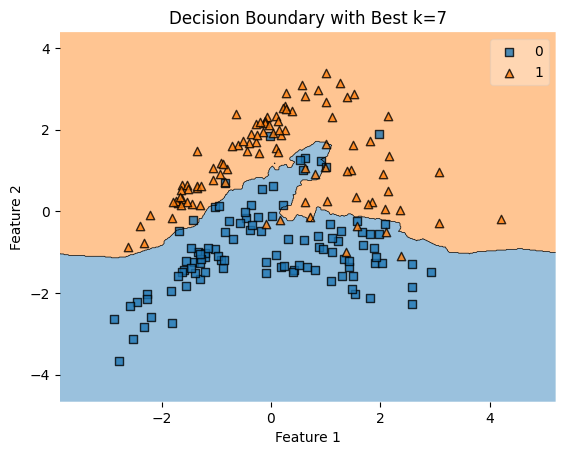

In [62]:
best_k = k_values[np.argmax(test_accuracies)]
best_clf = KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=best_clf)
plt.title(f"Decision Boundary with Best k={best_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

11. (0.5pt) Does the algorithm this this $k$ do a good job?

In [61]:
# (0.5pt) Does the algorithm with this k do a good job?
print(f"Train accuracy with k={best_k}: {train_accuracies[best_k - 1]:.2f}")
print(f"Test accuracy with k={best_k}: {test_accuracies[best_k - 1]:.2f}")

Train accuracy with k=7: 0.93
Test accuracy with k=7: 0.93


Yes, the algorithm does a good job with
𝑘
=
7
k=7 as both train and test accuracies are high at 93%, indicating strong performance and good generalization. The close match between train and test accuracies suggests no overfitting or underfitting.

#Part II. Weighted $k$NN (2.5pt)

1. (1.5pt) Modify the *predict_labels* function so that the score for class $c$ is calculated as follows:
$$
q(x)=\sum_{i=1}^{k}[y^{(i)}=c] \cdot \frac{1}{1+d(x,\ x^{(i)})}
$$
and the class with highest value of $q(x)$ is chosen as the label.

In [64]:
class kNNClassifier_w:
  def __init__(self, k=1):
     self.k = k

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    distances = self.compute_distances(X)
    return self.predict_labels(distances)

  def compute_distances(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    #thake the best from Part I
    num_test = X.shape[0]
    num_train = self.train_X.shape[0]
    distances = np.zeros((num_test, num_train))
    for i in range(num_test):
        distances[i, :] = np.sum(np.abs(X[i] - self.train_X), axis=1)
    return distances

  def predict_labels(self, distances):
    num_test = distances.shape[0]
    labels = np.zeros(num_test, dtype=int)

    for i in range(num_test):
        # Get indices of k nearest neighbors
        nearest_neighbors = np.argsort(distances[i])[:self.k]

        # Initialize a dictionary to keep scores for each class
        class_scores = {}

        for neighbor in nearest_neighbors:
            label = self.train_y[neighbor]
            distance = distances[i, neighbor]
            weight = 1 / (1 + distance)  # Compute the weight as per formula

            if label not in class_scores:
                class_scores[label] = 0
            class_scores[label] += weight  # Accumulate scores

        # Choose the class with the highest score
        labels[i] = max(class_scores, key=class_scores.get)

    return labels

2. Run this algorithm for $k=3$ and plot the desicion boundary.

In [65]:
clf_w = kNNClassifier_w(k=3)

In [66]:
clf_w.fit(X_train,y_train)

<Axes: >

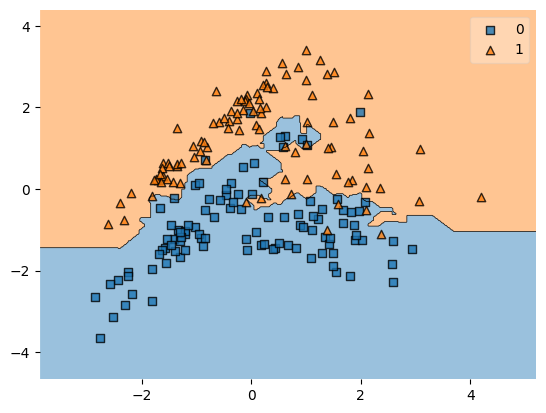

In [67]:
plot_decision_regions(X_train,y_train,clf_w)

3. (1pt) Use the buit-in algorithm with collable function

In [78]:
def func(d):
  return 1/(1+d)

<Axes: >

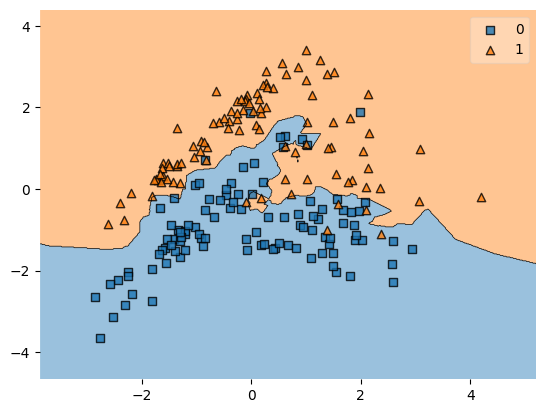

In [81]:
clf_builtin_weighted = KNeighborsClassifier(n_neighbors=3, weights=func)
clf_builtin_weighted.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, clf=clf_builtin_weighted)

4. Does the desicion boundary look the same? You can also compare it with vanilla algorithm.

The decision boundary for weighted
k-NN does not look the same as for vanilla
k-NN. The weighted approach produces smoother and more adaptive boundaries due to its distance-based weighting mechanism. In contrast, the vanilla approach results in sharper transitions between classes due to equal influence from all
k-neighbors.

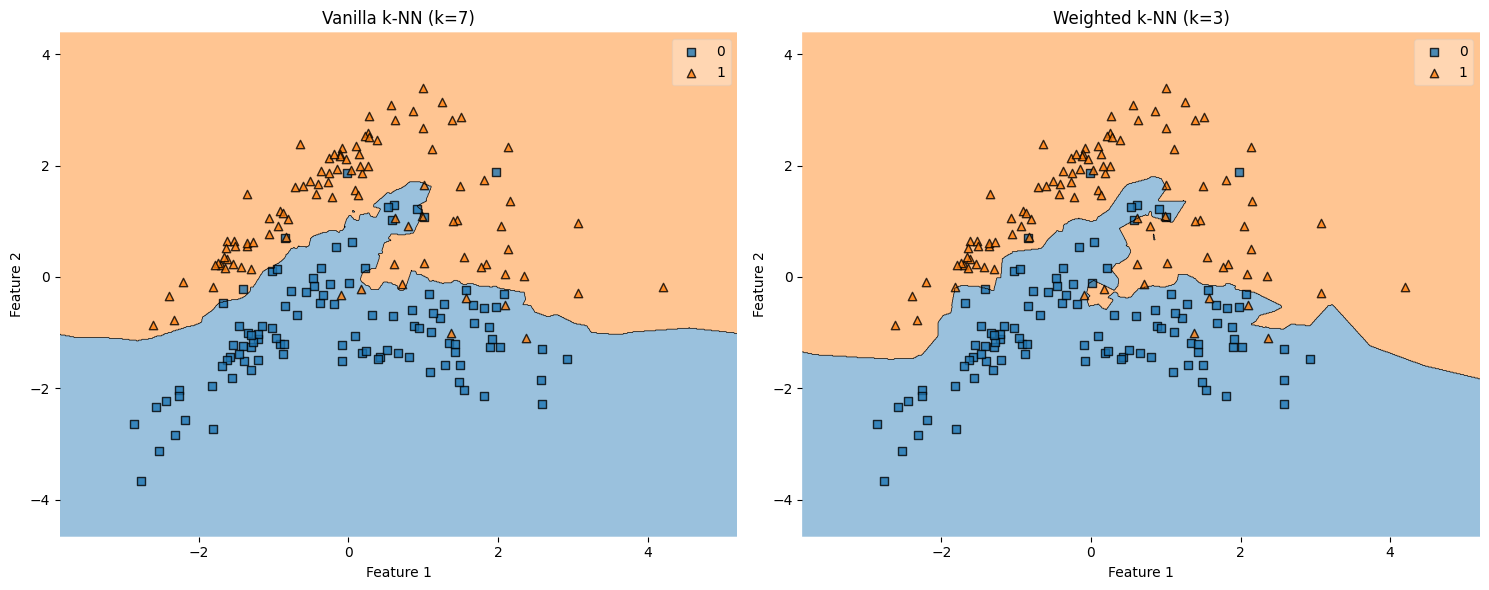

In [84]:

# Vanilla k-NN with k=7
clf_vanilla = KNeighborsClassifier(n_neighbors=7, weights='uniform')  # Uniform weights = vanilla kNN
clf_vanilla.fit(X_train, y_train)

# Weighted k-NN with k=3
def func(distances):
    return 1 / (1 + distances)  # Custom weighting function for weighted k-NN

clf_weighted = KNeighborsClassifier(n_neighbors=3, weights=func)
clf_weighted.fit(X_train, y_train)

# Plot decision boundaries side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Vanilla k-NN decision boundary
axes[0].set_title("Vanilla k-NN (k=7)")
plot_decision_regions(X_train, y_train, clf=clf_vanilla, ax=axes[0])
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Weighted k-NN decision boundary
axes[1].set_title("Weighted k-NN (k=3)")
plot_decision_regions(X_train, y_train, clf=clf_weighted, ax=axes[1])
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# Display the plots
plt.tight_layout()
plt.show()